# Exercise 3 - Decision Tree


In [2]:
import pandas as pd

churn = pd.read_csv('churn.csv')
churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,2,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,29.85,29.85,0
1,1,0,0,0,34,1,0,1,1,0,1,0,0,0,12,0,56.95,1889.5,0
2,1,0,0,0,2,1,0,1,1,1,0,0,0,0,1,1,53.85,108.15,1
3,1,0,0,0,45,0,0,1,1,0,1,1,0,0,12,0,42.30,1840.75,0
4,2,0,0,0,2,1,0,2,0,0,0,0,0,0,1,1,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,1,0,1,1,1,1,12,1,84.80,1990.5,0
7039,2,0,1,1,72,1,1,2,0,1,1,0,1,1,12,1,103.20,7362.9,0
7040,2,0,1,1,11,0,0,1,1,0,0,0,0,0,1,1,29.60,346.45,0
7041,1,1,1,0,4,1,1,2,0,0,0,0,0,0,1,1,74.40,306.6,1


In [3]:
emptyRows = churn[churn['TotalCharges'].str.match(' ')].index
churn = churn.drop(emptyRows)
churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,2,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,29.85,29.85,0
1,1,0,0,0,34,1,0,1,1,0,1,0,0,0,12,0,56.95,1889.5,0
2,1,0,0,0,2,1,0,1,1,1,0,0,0,0,1,1,53.85,108.15,1
3,1,0,0,0,45,0,0,1,1,0,1,1,0,0,12,0,42.30,1840.75,0
4,2,0,0,0,2,1,0,2,0,0,0,0,0,0,1,1,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,1,0,1,1,1,1,12,1,84.80,1990.5,0
7039,2,0,1,1,72,1,1,2,0,1,1,0,1,1,12,1,103.20,7362.9,0
7040,2,0,1,1,11,0,0,1,1,0,0,0,0,0,1,1,29.60,346.45,0
7041,1,1,1,0,4,1,1,2,0,0,0,0,0,0,1,1,74.40,306.6,1


In [4]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
churn[['tenure']] = min_max_scaler.fit_transform(churn[['tenure']]) 


In [5]:
churn[['MonthlyCharges']] = min_max_scaler.fit_transform(churn[['MonthlyCharges']]) 
churn[['TotalCharges']] = min_max_scaler.fit_transform(churn[['TotalCharges']])

In [6]:
from sklearn.model_selection import train_test_split

trainset, testset = train_test_split(churn, train_size=0.8, random_state=1)

Decision Trees are simple but robust classifiers that can be used with a variety of data types, that have the advantage of being easily interpretable. Furthermore, while we have performed some preparatory activities to ready the data for use, this is not always essential when using this method. Decision Trees are an intuitive concept; each “leaf” node represents a feature within the dataset, with each branch being the possible values (or ranges of values) associated with each feature. These can be mapped out – with class predictions attached – to create a tree-like structure.

To build a decision tree, we will use sklearn package for the model and to visualise the resulting tree.

In [7]:
from sklearn import tree

When building the decision tree, we need to encode feature values to numeric representation such as ‘yes’ and ‘no’ to 1 and 0. The preprocessing module of the sklearn library has function LabelEncoder() that can transform all string type feature values into numeric representation.

In [8]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder() 
trainsetEncoded = trainset.apply(le.fit_transform) 
testsetEncoded = testset.apply(le.fit_transform)

The decision tree model can be initiated using DecisionTreeClassifier() function. The max_depth parameter is used to decide about depth of the tree.

In [9]:
DTModel = tree.DecisionTreeClassifier(max_depth=3)

The decision tree model can be trained on testset using fit() function. The fit() function require features as first parameter and class labels or the target as second. Out churn trainset has 20 columns, where the last one is the class label. The following statements separates first 19 columns as features and the last column as target variable.

In [10]:
features = trainsetEncoded.iloc[: , :19] 
target = trainsetEncoded.iloc[:,-1:] 
DTModel = DTModel.fit(features, target )

Once the tree has been built, we can then visualise it to explore the results.

AttributeError: 'list' object has no attribute 'show'

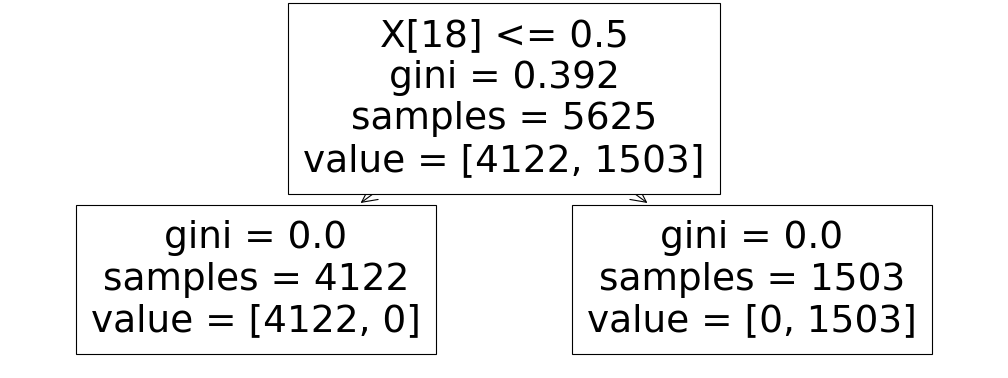

In [22]:
from matplotlib.pyplot import figure 

figure(figsize=(16, 6), dpi=80) 

tree.plot_tree(DTModel)
plt.show()

The plot that is created should look similar to the one shown above. However, the feature name on which the decision tree has made a decision will not be shown. The right branch of every node represents true value while the left branch shows the false. Use the following code to display feature names along with their conditional values

In [21]:
fn=list(features.columns.values)
cn=['Yes','No']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (16,6), dpi=300)
tree.plot_tree(DTModel, feature_names = fn, class_names=cn, filled = True);

AttributeError: 'list' object has no attribute 'subplots'

** no idea what's going on here, this all just falls apart ** 